<a href="https://colab.research.google.com/github/DevBatra05/DeepLearningLab/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import os
import matplotlib.pyplot as plt
import cv2


In [ ]:
# Download dataset
path = kagglehub.dataset_download("gpiosenka/cards-image-datasetclassification")
print("Dataset Path:", path)


100%|██████████| 385M/385M [00:06<00:00, 58.3MB/s]

Extracting files...


Dataset Path: /root/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2


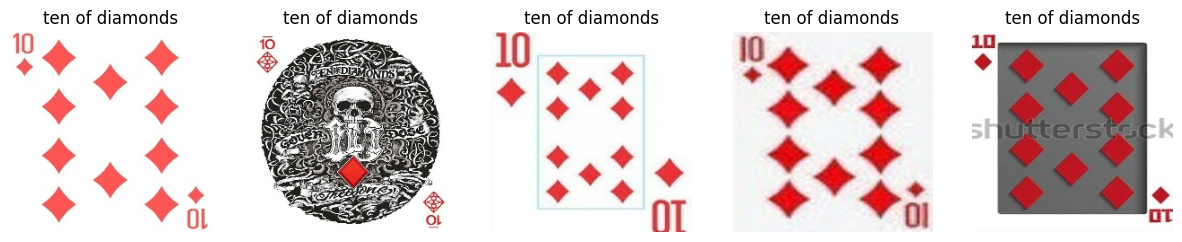

In [ ]:
import random

# Choose dataset folder (train set)
train_path = os.path.join(path, "train")

# Pick a random class
random_class = random.choice(os.listdir(train_path))
class_path = os.path.join(train_path, random_class)

# Pick random images from that class
images = random.sample(os.listdir(class_path), 5)

plt.figure(figsize=(15,5))
for i, img_name in enumerate(images):
    img_path = os.path.join(class_path, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.title(random_class)
    plt.axis("off")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os


In [ ]:
# Dataset paths
train_dir = os.path.join(path, "train")
test_dir  = os.path.join(path, "test")

# Preprocessing with augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


In [ ]:
# Load MobileNetV2 without top classifier
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))

# Freeze pretrained layers
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(train_generator.num_classes, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 53)             │        13,621 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,599,541 (9.92 MB)

 Trainable params: 341,557 (1.30 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=10)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 238s 974ms/step - accuracy: 0.1402 - loss: 3.3504 - val_accuracy: 0.3509 - val_loss: 2.1229
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 231s 965ms/step - accuracy: 0.3386 - loss: 2.2267 - val_accuracy: 0.4642 - val_loss: 1.8647
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 232s 971ms/step - accuracy: 0.4181 - loss: 1.9254 - val_accuracy: 0.4491 - val_loss: 1.7675
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 232s 969ms/step - accuracy: 0.4779 - loss: 1.7370 - val_accuracy: 0.5019 - val_loss: 1.6082
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 228s 953ms/step - accuracy: 0.4972 - loss: 1.6506 - val_accuracy: 0.4717 - val_loss: 1.6714
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 225s 940ms/step - accuracy: 0.5323 - loss: 1.5312 - val_accuracy: 0.5057 - val_loss: 1.6209
Epoch 7/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 259s 928ms/step - accuracy: 0.5693 - loss: 1.4227 - val_accuracy: 0.4792 - val_loss: 1.7124
Epoch 8/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 226s 943ms/step - accuracy: 0.5701 -

In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.2f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 642ms/step - accuracy: 0.5403 - loss: 1.5678
Test Accuracy: 0.51


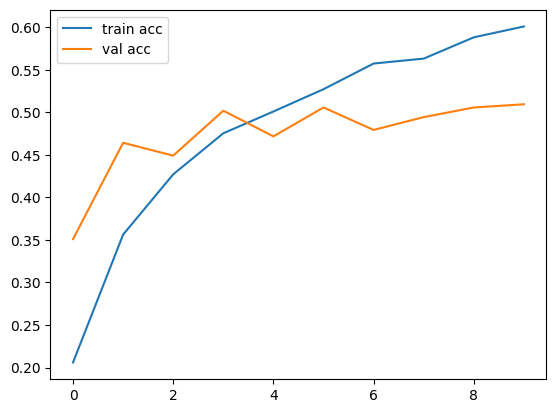

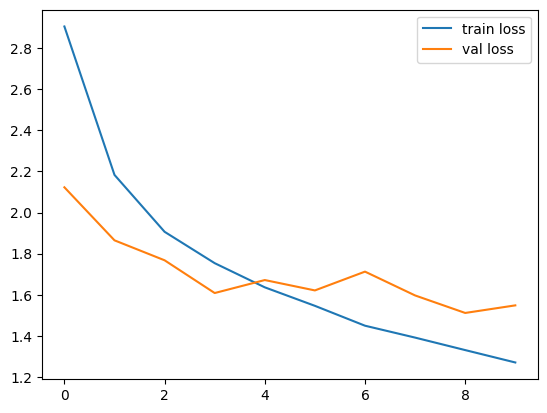

In [ ]:
plt.plot(history.history['accuracy'], label="train acc")
plt.plot(history.history['val_accuracy'], label="val acc")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label="train loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.legend()
plt.show()

In [16]:
# Unfreeze last 30 layers for fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Compile again with a lower learning rate
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=30,
                    callbacks=[early_stop])


Epoch 1/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 311s 1s/step - accuracy: 0.2756 - loss: 2.7186 - val_accuracy: 0.5019 - val_loss: 1.6516
Epoch 2/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 304s 1s/step - accuracy: 0.4181 - loss: 1.9403 - val_accuracy: 0.4943 - val_loss: 1.6322
Epoch 3/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 311s 1s/step - accuracy: 0.4741 - loss: 1.7150 - val_accuracy: 0.5245 - val_loss: 1.6051
Epoch 4/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.5132 - loss: 1.6051 - val_accuracy: 0.5245 - val_loss: 1.5388
Epoch 5/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.5364 - loss: 1.5096 - val_accuracy: 0.5585 - val_loss: 1.4865
Epoch 6/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - accuracy: 0.5714 - loss: 1.3916 - val_accuracy: 0.5774 - val_loss: 1.4279
Epoch 7/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 312s 1s/step - accuracy: 0.5836 - loss: 1.3316 - val_accuracy: 0.5774 - val_loss: 1.3654
Epoch 8/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - accuracy: 0.6025 - loss: 1.3169 - val_accu

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.3,
                                   horizontal_flip=True)


In [19]:
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224,224,3))


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
                   precision    recall  f1-score   support

     ace of clubs       0.00      0.00      0.00         5
  ace of diamonds       0.00      0.00      0.00         5
    ace of hearts       0.00      0.00      0.00         5
    ace of spades       0.00      0.00      0.00         5
   eight of clubs       0.00      0.00      0.00         5
eight of diamonds       0.00      0.00      0.00         5
  eight of hearts       0.00      0.00      0.00         5
  eight of spades       0.00      0.00      0.00         5
    five of clubs       0.00      0.00      0.00         5
 five of diamonds       0.00      0.00      0.00         5
   five of hearts       0.00      0.00      0.00         5
   five of spades       0.00      0.00      0.00         5
    four of clubs       0.33      0.20      0.25         5
 four of diamonds       0.00      0.00      0.00         5
   four of hearts       0.00      0.00      0.00         5
   four of spades 

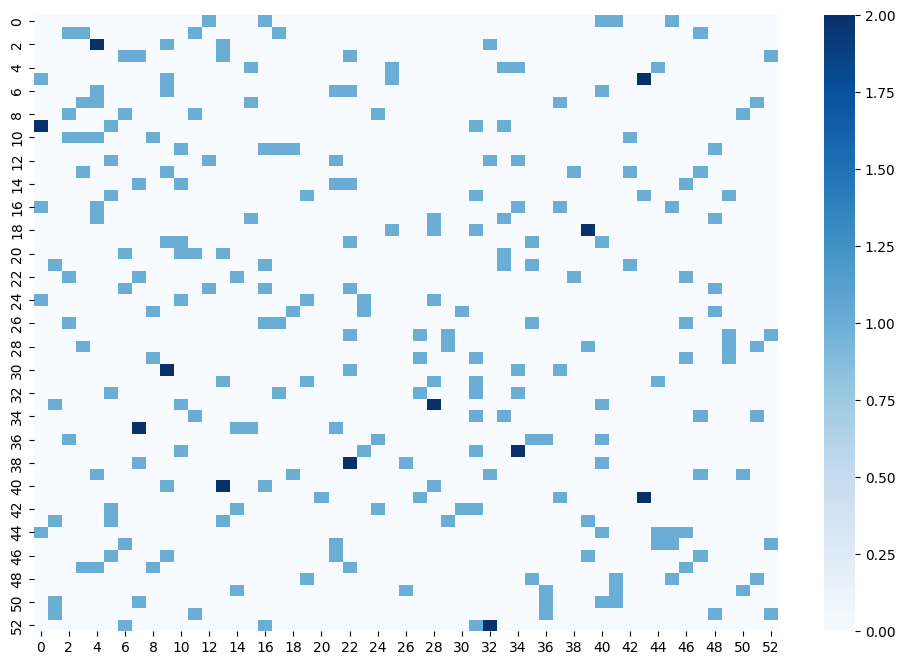

In [20]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Report
print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.show()
